<a href="https://colab.research.google.com/github/Mirthu24/NLP_Project/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch torchvision torchaudio datasets pillow streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## **TEXT SUMMARIZATION**

In [2]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

In [3]:
# Load pre-trained model and tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

def summarize(text, model, tokenizer, max_length=130, min_length=30, do_sample=False):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_length, min_length=min_length, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [4]:
# Sample input text
text = """
Data Science and Data Engineering are two crucial disciplines in the field of Artificial Intelligence and Big Data analytics.
A Data Scientist primarily focuses on analyzing data, building machine learning models, and deriving insights to solve business problems.
They use statistical techniques, programming languages like Python and R, and machine learning frameworks such as TensorFlow and PyTorch.
On the other hand, Data Engineers focus on designing, building, and maintaining the data pipelines that enable the collection, storage, and processing of large-scale datasets.
They work with tools like Apache Spark, Hadoop, and SQL databases to ensure data is properly structured and accessible for analysis.
While Data Scientists focus on extracting insights, Data Engineers ensure that the infrastructure is in place to support data-driven decision-making.
Companies today require both roles to work together to maximize the value of data and drive innovation.
The demand for skilled Data Scientists and Data Engineers continues to grow as industries increasingly rely on data-driven strategies.
"""

# Perform summarization
summary = summarize(text, model, tokenizer)
print("Original text:\n", text)
print("\nSummary:\n", summary)

Original text:
 
Data Science and Data Engineering are two crucial disciplines in the field of Artificial Intelligence and Big Data analytics.
A Data Scientist primarily focuses on analyzing data, building machine learning models, and deriving insights to solve business problems.
They use statistical techniques, programming languages like Python and R, and machine learning frameworks such as TensorFlow and PyTorch.
On the other hand, Data Engineers focus on designing, building, and maintaining the data pipelines that enable the collection, storage, and processing of large-scale datasets.
They work with tools like Apache Spark, Hadoop, and SQL databases to ensure data is properly structured and accessible for analysis.
While Data Scientists focus on extracting insights, Data Engineers ensure that the infrastructure is in place to support data-driven decision-making.
Companies today require both roles to work together to maximize the value of data and drive innovation.
The demand for ski

## **NEXT WORD PREDICTION**

In [5]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [6]:
# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model to evaluation mode
model.eval()

def predict_next_word(prompt, model, tokenizer, top_k=5):
    # Tokenize input text
    inputs = tokenizer(prompt, return_tensors='pt')

    # Generate predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get logits of the last token in the sequence
    next_token_logits = outputs.logits[:, -1, :]

    # Filter the top k tokens by their probability
    top_k_tokens = torch.topk(next_token_logits, top_k).indices[0].tolist()

    # Decode the top k tokens to their corresponding words
    predicted_tokens = [tokenizer.decode([token]) for token in top_k_tokens]

    return predicted_tokens

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [7]:
# Example usage
prompt = "Data science is an important field because"
predicted_words = predict_next_word(prompt, model, tokenizer)
print(f"Prompt: {prompt}")
print(f"Next word predictions: {predicted_words}")


Prompt: Data science is an important field because
Next word predictions: [' it', ' of', ' the', ' we', ' its']


## **STORY PREDICTION**

In [8]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In [9]:
def generate_story(prompt, model, tokenizer, max_length=100, temperature=0.7, top_k=50, top_p=0.9, repetition_penalty=1.2, do_sample=True):
    # Tokenize input text
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate text with additional parameters
    with torch.no_grad():
        output = model.generate(
            **inputs,
            max_length=max_length,
            temperature=temperature,
            top_k=top_k,
            top_p=top_p,  # Nucleus sampling to reduce repetition
            repetition_penalty=repetition_penalty,  # Penalize repeated words
            do_sample=do_sample,
            pad_token_id=tokenizer.eos_token_id
        )

    # Decode generated text
    story = tokenizer.decode(output[0], skip_special_tokens=True)

    return story

In [10]:
# Example usage
prompt = "A team of Data Science Engineers work for"
generated_story = generate_story(prompt, model, tokenizer)
print(generated_story)

A team of Data Science Engineers work for the European Centre in Barcelona. The goal is to create a system that will allow data scientists from all over Europe and abroad, including universities with strong knowledge base about health care systems, access management services such as healthcare monitoring platforms or information technology providers (ITPs), to collaborate on an integrated solution tailored to their specific needs without having any direct involvement by government departments."
- AAR


## **SENTIMENT ANALYSIS**

In [11]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

In [12]:
# Load model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

# Define function for sentiment analysis
def analyze_sentiment(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    sentiment = "Positive" if predicted_class == 1 else "Negative"

    return sentiment

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [13]:
# Example Usage
text_1 = "I love this project! It's amazing."
print("Sentiment:", analyze_sentiment(text_1, model, tokenizer))

Sentiment: Positive


In [14]:
# Example Usage
text_2 = "I am not happy with your performance."
print("Sentiment:", analyze_sentiment(text_2, model, tokenizer))

Sentiment: Negative


## **QUESTION ANSWERING**

In [15]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

In [16]:
# Load the pre-trained model and tokenizer
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

def answer_question(question, context):
    # Tokenize input question and context
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")

    # Get model output
    outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    # Get the most likely start and end of the answer
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1

    # Ensure answer is valid
    if answer_start >= answer_end:
        return "I couldn't find a relevant answer in the given context."

    # Convert tokens to the answer
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][answer_start:answer_end]))

    return answer.strip()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
# Define a context and a question
context = """
In the next few decades, artificial intelligence (AI) and quantum computing will revolutionize industries, enhancing automation and decision-making processes.
AI-powered assistants will become more human-like, helping individuals in their daily lives with real-time problem-solving.
Quantum computers will surpass classical machines, solving complex problems in seconds that would take years for today's supercomputers.
With advancements in biotechnology, personalized medicine will allow treatments to be tailored to individual genetic profiles, significantly improving healthcare.
The rise of autonomous transportation will reduce traffic congestion and enhance safety.
Moreover, space exploration will expand beyond Mars, with AI-driven robotics assisting astronauts on deep-space missions.
"""

question = "What role will AI-driven robotics play in space exploration?"

# Get the answer
answer = answer_question(question, context)
print(f"Question: {question}")
print(f"Answer: {answer}")


Question: What role will AI-driven robotics play in space exploration?
Answer: assisting astronauts


In [18]:
Question_2 = "How will quantum computers impact problem-solving in the future?"
answer_2 = answer_question(Question_2, context)
print(f"Question: {Question_2}")
print(f"Answer: {answer_2}")

Question: How will quantum computers impact problem-solving in the future?
Answer: surpass classical machines


## **IMAGE GENERATION**

In [19]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display

In [23]:
# Load the pre-trained Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

def generate_image(prompt, pipe):
    with torch.no_grad():
        image = pipe(prompt).images[0]
    return image

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

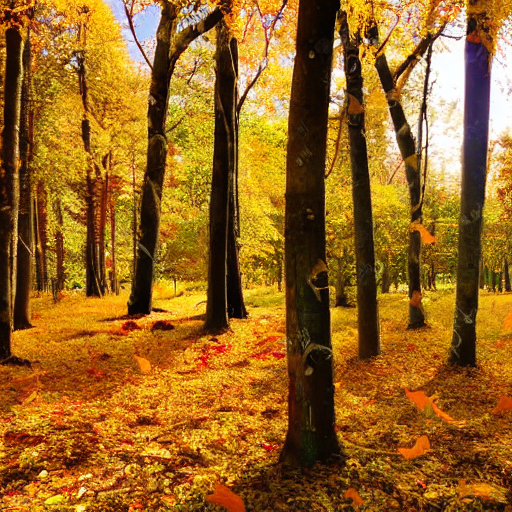

In [27]:
# Example usage
prompt = "A vibrant autumn forest with falling leaves"
image = generate_image(prompt,pipe)

# Display the image correctly in Colab
display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

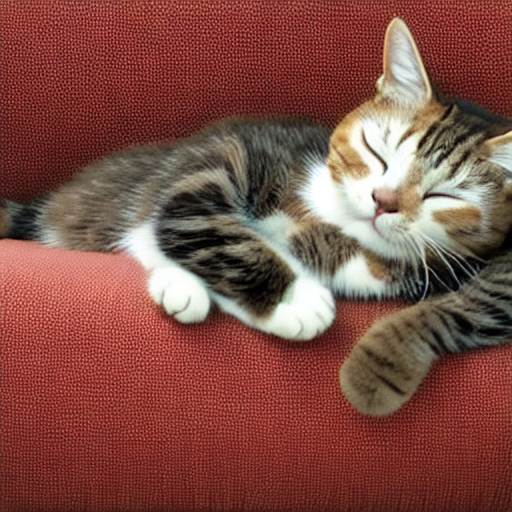

In [29]:
# Example usage
prompt_2 = "A cute cat sleeping on a sofa"
image_2 = generate_image(prompt_2,pipe)

# Display the image correctly in Colab
display(image_2)